**Table of Contents**

>[Project 1](#scrollTo=DHc26B0_sZbA)

>[What is SVM?](#scrollTo=tmCr1anSsmiD)

>>[Describing SVM Classifier](#scrollTo=qMWasJxVFt6h)

>>[Visual Representation of SVM Components](#scrollTo=qlJZJjaJEB9D)

>[Extraction and Loading](#scrollTo=k-SoAoLStqC4)

>>[Summary of the Dataset](#scrollTo=FLQ7lcs3t84U)

>[Preprocessing](#scrollTo=oFAdfqcZtzLr)

>>[Encoding Target Variable](#scrollTo=MKT_XzJpumei)

>[SVM Model (Without Scaling)](#scrollTo=JicmIlZJxPAM)

>>[Required Libraries](#scrollTo=SaiqFJmBRpxi)

>>[Train Test Split](#scrollTo=MFBm8G27IbD4)

>>[Modeling](#scrollTo=98vZB1ZEIdzK)

>>[Model Performance](#scrollTo=GbNN6b3BE4tU)

>[SVM Model (With Scaling)(Main Model)](#scrollTo=Sg4K9gYLyQYY)

>>[Scaling the Features](#scrollTo=QE6kzjhCIy81)

>>[Train Test Split](#scrollTo=9xXpVTSVI3Sl)

>>[Modeling (With Probabilities)](#scrollTo=BX-D9wMtI9Fh)

>>[Model Performance](#scrollTo=9lf9W0AmFBTv)

>>>[ROC and Adjusting Thresholds](#scrollTo=Ye8wxKyn4YHQ)

>>>>[Adjusting Thresholds](#scrollTo=DQaPnABjIRb8)

>>[Performance for Linear Kernel](#scrollTo=AwQzZwsj4OO5)

>>[K-Fold Cross Validation](#scrollTo=H1lIZaiPRF0y)

>>>[Leave One Out Cross Validation (LOOCV)](#scrollTo=hxECvpyAYsoH)

>>[Hyperparameter Tuning](#scrollTo=AWimUIwo9Vjc)

>>[Base Model](#scrollTo=dsUzQ8z45sTB)

>>>[Random Probability Based](#scrollTo=GG-5aSdN55xj)

>>>[Using a Dummy Classifier](#scrollTo=Tg_PiQ0d5-yC)

>[Visualization and Dimensionality Reduction](#scrollTo=dx_1Cg6RzYCU)

>>[The Curse of Dimensionality](#scrollTo=WMpfEtBVXBBH)

>>[Principal Component Analysis (PCA)](#scrollTo=JDKU4r4lW9hL)

>>>[Visualization](#scrollTo=IqPfb_R4SGNE)

>>>[Explaining the Visualization Code](#scrollTo=UL7gEVTf8qwi)

>>>[Linear vs Non-Linear (RBF) Boundaries](#scrollTo=IraEBsAIXQ4e)

>>>[Accuracy](#scrollTo=nqx36YDiD3ue)

>>[AutoEncoder](#scrollTo=G0fGlx3m68HA)

>>>[Encoding, Decoding and Visualizing](#scrollTo=_hcQHHzr0047)

>>>[Accuracy](#scrollTo=pu_qNqpuBttf)

>[Comparison](#scrollTo=s_PjQ-6vNqXY)

>[How Kernels Affect SVM (Using make_moons)](#scrollTo=80e0tvPi5bNP)

>>[Visualizing How Both Kernels Classified Train and Test Data](#scrollTo=H4AxsbXxQ2wX)

>>[Linear vs RBF Performance](#scrollTo=v7j5SGUTRBly)

>[SVM with 3 Target Variables (Using Iris)](#scrollTo=iSHDPQsI5pM8)

>>[Base Model (3 Target Categories)](#scrollTo=SNV_h091VuRn)



# **Project 1**
**Demonstrating the SVM Classifier algorithm**



We import some of the required libaries first

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# What is SVM?

## Describing SVM Classifier

* A Support Vector Machine (SVM) classifier is a supervised machine learning algorithm that classifies data into categories by finding the best separating boundary (hyperplane) between different classes.
* SVMs define a decision boundary along a margin that separates most of the points into two classes. But it also leaves room for some misclassifcation to better cater to the all data.
* When SVM tries to find the best separating hyperplane, it only cares about the points closest to that boundary. All other points (further away) do not affect the position of the boundary.
* SVM can handle both linear and non-linear data using kernels.
* A **linear kernel** draws a straight-line (or hyperplane) decision boundary to separate the data. It works with higher dimensions as well. It does not need the kernel trick (explained in the next line), because it already works in the original feature space.
* **RBF (Radial Basis Function)** draws curved, flexible boundaries and works best with non-linear data. RBF kernel lets SVM implicitly map data into a higher-dimensional feature space to make it linearly separable This is known as the Kernel **Trick**.
* **Polynomial Kernel** lets an SVM draw curved boundaries instead of straight lines. It does this by adding power terms (like squares or cubes of the features)

More information regarding SVM
* The hyperplane maximizes the margin (distance between the boundary and support vectors) to get the best possible distinction among the classes.
* Support vectors are the data points that lie closest to the decision boundary (hyperplane) in an SVM classifier. These are the points that support or define
the position and orientation of the hyperplane. Changing the position of support vectors would alter the margin and create a new corresponding hyperplane.
* Kernels are especially helpful when mapping non-linear data where we cannot draw a straight decision boundary as kernels let SVM draw curved or flexible boundaries instead of just straight lines, by secretly mapping data into higher dimensions where that curved separation becomes a simple straight line.
* The higher dimensionality of SVM can also draw hyperplanes for 4 dimensional data or above as well.
* SVM has borth classfier and regressor algorithms.An SVM (Support Vector Machine) classifier is a tool used to sort things into different groups based on their features, like deciding if a tumor is malignant or benign in your Breast Cancer dataset. It works by drawing a line or boundary in a way that keeps the groups as far apart as possible.
* An SVM regressor is a tool that predicts continuous numbers, like guessing someone’s age or the price of a house, instead of sorting things into groups. It tries to fit a line or curve through the data points
* We are working with an SVM classifier

**For the rest, we will demonstrate how an SVM algorithm works using the breast cancer wisconsin dataset from uci**

## Visual Representation of SVM Components

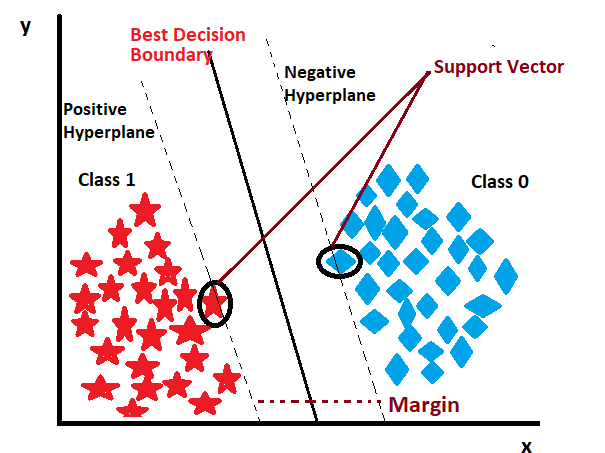

However, SVM allows misclassification as we mentioned above as real data is not so easily separable
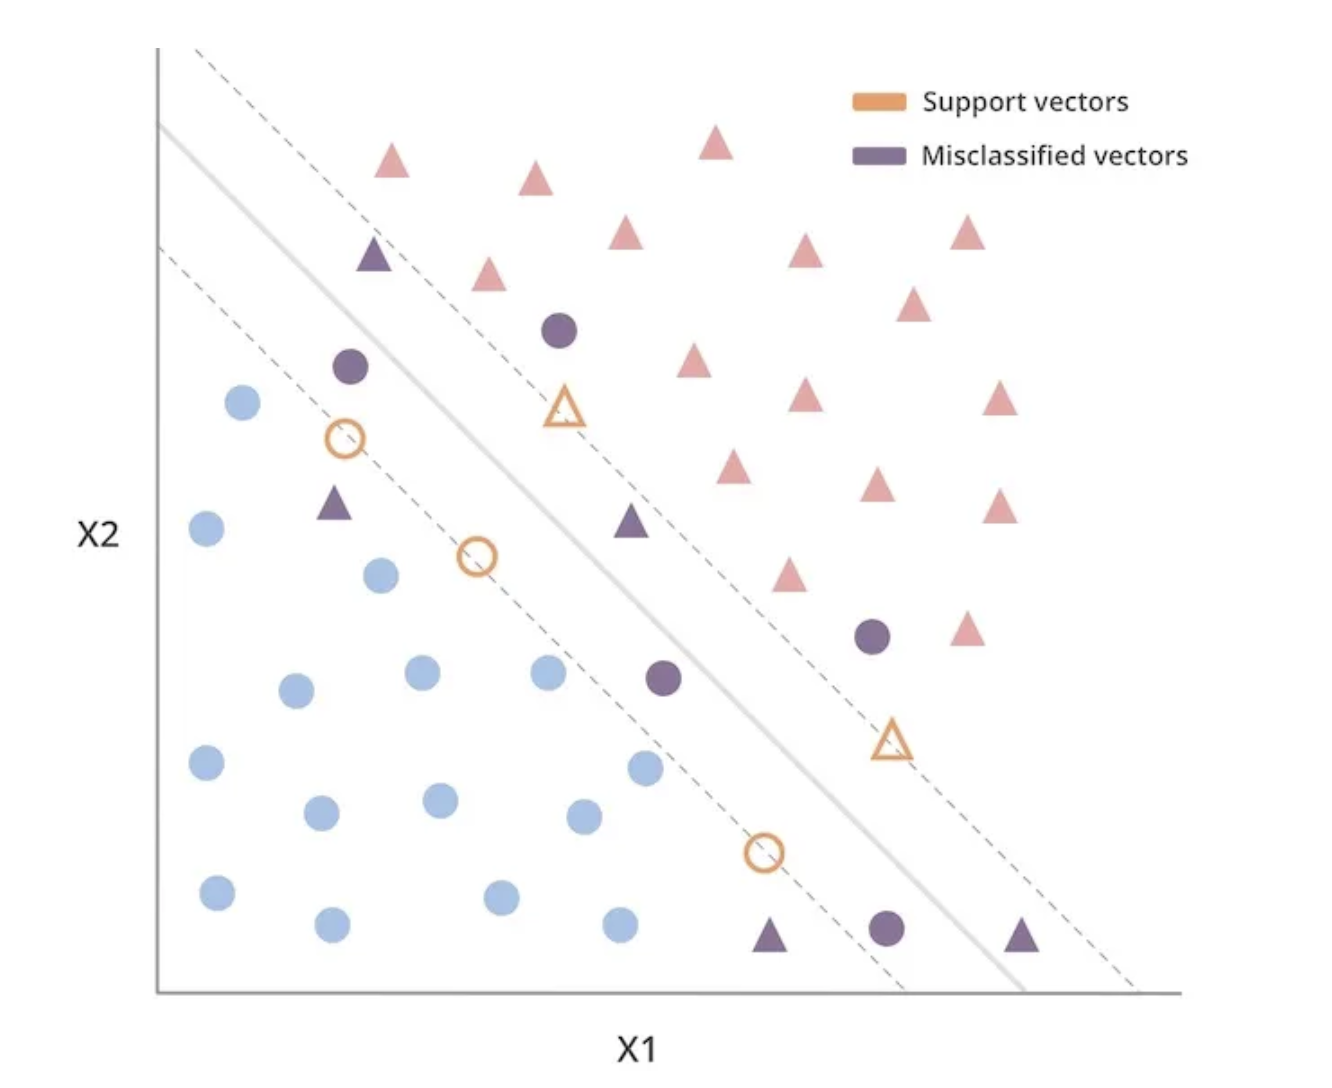

# Extraction and Loading

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

Apart from the Target variable and ID, all the other features are numeric, making the features ready for the algorithm. There are also no missing values.



## Summary of the Dataset

* The dataset describes characteristics of the cell nuclei present in the image and helps us understand whether the cells are malignant or benign

[Detailed Information About the Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

**The target variable (Diagnosis) is in categorical form. We will transform it into a numeric form as SVM only deals with numeric data**

* SVM calculations require numeric data, not text or categories like “Red,” “Blue,” or “Green.” That is why we need to encode the data from text to numbers.

* SVMs find the optimal hyperplane by maximizing the margin, which is defined as the distance between data points and the hyperplane and distances requires numeric inputs.

* Furthermore, The kernel trick (e.g., RBF, polynomial) implicitly maps data into a higher-dimensional space using dot products. These operations assume vectors of numbers.

# Preprocessing
* Our preprocessing portion is relatively simple as our dataset is already cleaned. It has no missing values and the features are numeric so it is mostly ready for SVM

In [4]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


However, the target variable is catgorical and requires encoding

In [5]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [6]:
y['Diagnosis'].unique()
print(y['Diagnosis'].value_counts())

Diagnosis
B    357
M    212
Name: count, dtype: int64


The dataset is fairly balanced. However, the benign class accounts for a higher proportion than the malignant class.

## Encoding Target Variable
We turn the cateogrical target variables into numeric in the following step
* We use LabelEncoder as our targets don't have an inherent order

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = y.copy()
y['target'] = le.fit_transform(y['Diagnosis'])

In [8]:
y['target'].value_counts()

,count
target,
0,357
1,212


We do not require the categorical Diagnosis column from before so we drop it

In [9]:
y = y.drop('Diagnosis', axis=1)

In [10]:
print("y dtype:", y['target'].dtype)
print("y shape:", y.shape)
print("y unique:", np.unique(y['target']))

y dtype: int64
y shape: (569, 1)
y unique: [0 1]


In [11]:
# .ravel() flattens a 2-D column-vector into the 1-D array that scikit-learn classifiers require for the target
y = y.values.ravel()

# SVM Model (Without Scaling)

## Required Libraries
Libraries required for this section (Imported in the beginning)

In [12]:
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report

## Train Test Split
* We are splitting the data into w portions: Training (80%) and Testing (20%) to see how well our SVM Classifier performs

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify=y, random_state=42) # X contains the features and y contains our encoded targets

# Here X contains the features and y contains the encoded target
# Here the test size parameter indicates the proportion of data to be used for testing
# Stratify parameter ensures that the test dataset will have the same proportion of malignants and benings as the original data
# Stratify helps us account for the slight class imbalance

## Modeling

In [14]:
svm_model = SVC ()
svm_model.fit (X_train, y_train)

# Our model uses Radial Basis Function (RBF) kernel by default which can handle non-linear data well, which is often the case with real life data

SVC()

In [15]:
y_pred_svm = svm_model.predict(X_test) # Here we let the model predict outcomes using the test dataset we made

In [16]:
conf_svm = confusion_matrix(y_test, y_pred_svm)
pd.DataFrame(conf_svm, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

# We make a confusion matrix of the actual target values and predicted target values

,Model 0,Model 1
Actual 0,72,0
Actual 1,11,31


Shows that the model accuracte identified 72 benign cases and 31 malignant cases. Howeever, 11 malignant cases were shown to be benign giving us Type II error

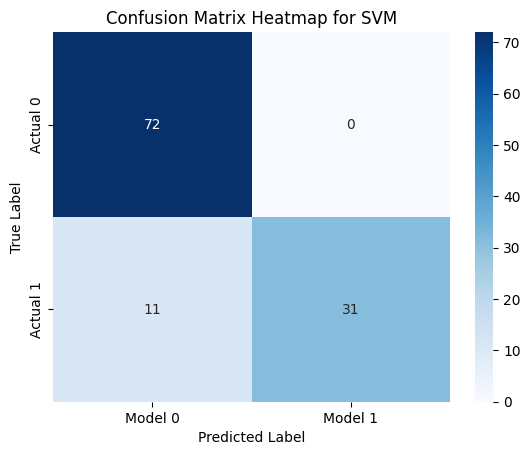

In [17]:
sns.heatmap(conf_svm, annot=True, cmap='Blues', xticklabels=['Model 0', 'Model 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model Performance

In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        72
           1       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



Our model before scaling
* is 90% accurate
* This is better than our persistence model of 50% as have a better shot at identifying malignant cases than random guessing. However, health issues are sensitive and this accuracy may not be very helpful depending on our use case

In [19]:
# We also add the performance of the linear kernel before scaling
svm_model_lin_no_scale = SVC (kernel='linear')
svm_model_lin_no_scale.fit (X_train, y_train)
y_pred_svm_lin_no_scale = svm_model_lin_no_scale.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_lin_no_scale))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



We get similar results, with slightly better accuracy of 92%

# SVM Model (With Scaling)(Main Model)

## Scaling the Features

In [20]:
# We use the MinMaxScaler to bring all the features in between 0 and 1
# This is the additional code we need for scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

I tried out both StandardScaler and MinMaxScaler and found that the latter performs slightly better with our dataset. Reasons could include:

* MinMaxScaler scales data to a fixed range (default [0, 1]), preserving the shape of the distribution and for datasets without significant outliers, which seems to be the case for our dataset as we will see after visualization.

## Train Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,  stratify=y, random_state=42)


## Modeling (With Probabilities)

In [22]:
svm_model = SVC (probability=True, random_state=42)
# We set probability=True to find ROC curve later on
# random_state = 42 helps us be able to exactly reproduce the model
svm_model.fit (X_train, y_train)

SVC(probability=True, random_state=42)

In [23]:
y_pred_svm_scaled = svm_model.predict(X_test)

In [24]:
conf_svm_scaled = confusion_matrix(y_test, y_pred_svm_scaled)
pd.DataFrame(conf_svm_scaled, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,72,0
Actual 1,2,40


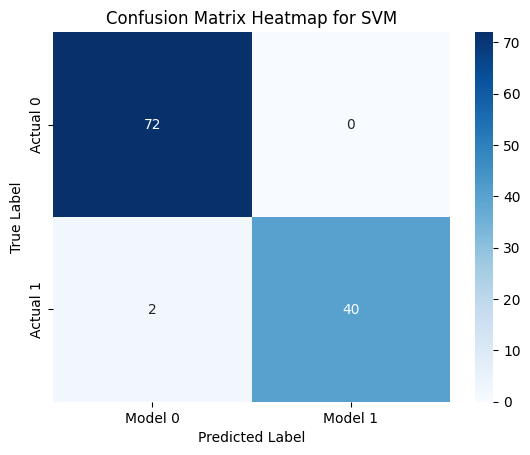

In [25]:
sns.heatmap(conf_svm_scaled, cmap='Blues',annot=True, xticklabels=['Model 0', 'Model 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model Performance

In [26]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_scaled))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Our model after scaling
* Accuracy increased to 98% and we see improvements accross all metrics
* Model is better than persistence model and is now much better at detecting actual malignant cases than it was before scaling
* SVM relies on distances between points to find the best boundary. Unscaled data makes features with big numbers (like radius) overpower smaller ones (like smoothness), leading to a lopsided boundary. MinMax scaling puts everything on a level playing field (0 to 1), so the model considers all features fairly and gives us much better results

**These metrics only explain a part of how our model performs. We will next look into ROC and AUC to understand nuances of model performance**

### ROC and Adjusting Thresholds

* ROC stands for "Receiver Operating Characteristic" curve. It’s a graph that shows how well our model distinguishes between two classes (e.g., malignant vs. benign) across different decision thresholds

* The curve plots TPR vs. FPR as you vary the threshold for classifying a prediction as positive (e.g., from 0 to 1)

* A **threshold** is a cutoff value used to decide whether a prediction should be classified as the positive class (e.g., 'M' = 1) or the negative class (e.g., 'B' = 0)

* Default threshold for probability is 0.5 (positive if > 0.5, else negative)

In [27]:
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability of positive class

**AUC** stands for "Area Under the Curve" and is a single number summarizing the ROC curve. It represents the probability that the model ranks a randomly chosen positive instance higher than a randomly chosen negative instance

In [28]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba_svm)
print(f"SVM AUC Score: {auc_score:.4f}")

SVM AUC Score: 0.9964


We have an AUC of 99.64% indicating very strong performance

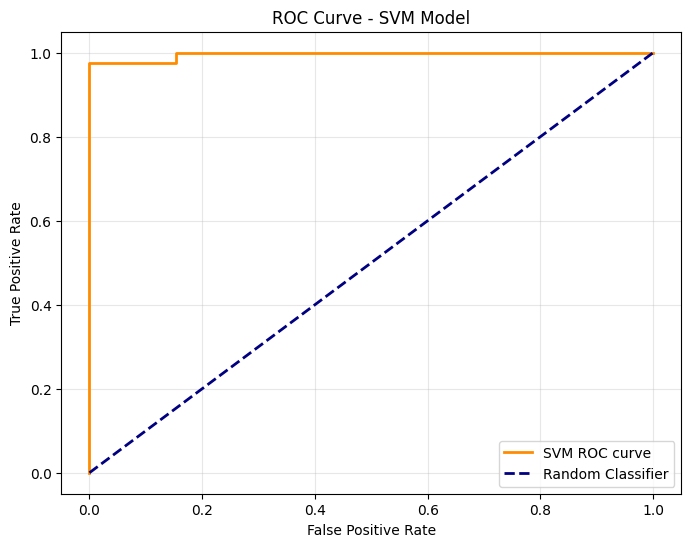

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'SVM ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

#### **Adjusting Thresholds**

* Selecting a threshold depends on the context of our dataset.
* In our case of detecting malignant cells, we want to detect as many true (1) cases as possible, so we want to reduce **Type II** error (false negative) as much as we can. In a Type II error model fails to detect a true case of malignant cell
* For this we can **reduce** our threshold so that the condition for a cell to be classified as malignant becomes lower (It is classfied as malignant even with lower possibility of it being so based on the features). This may help us identify fringe cases where malignant cells act similar to benign cells
* However, the **tradeoff** is that we become more prone to **Type I** error (false positive), which is the chances of classfying benign cases as malignant increases. Now, for the medical field this is not a big issue as patients can go thorugh further inspection to check whether their case is malignant or not.
* This can be a problem is other fields such as business where **Type I** error may increase operating costs.
We will now try different thresholds and see how the model performs

In [30]:
# We start with the default 0.5 threshold for our model

custom_threshold = 0.5  # We adjust this value based on the threshold we want, in this case we put it to the default 0.5
y_pred_custom = (y_pred_proba_svm >= custom_threshold).astype(int)

conf_svm_proba = confusion_matrix(y_test, y_pred_custom)
pd.DataFrame(conf_svm_proba, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,72,0
Actual 1,2,40


The model was not able to identify 2 actual malignant cases. This might be a problem as people with malignant cells may be left untreated due to problems in the algorithm

In [31]:
# We reduce the threshold a bit to see if we can reduce Type II error

custom_threshold = 0.4  # We adjust this value based on the threshold we want, in this case we put it to the default 0.5
y_pred_custom = (y_pred_proba_svm >= custom_threshold).astype(int)

conf_svm_proba = confusion_matrix(y_test, y_pred_custom)
pd.DataFrame(conf_svm_proba, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,71,1
Actual 1,1,41


* We get 1 type II error and 1 type I error
* The accuracy of the overall model remains the same
* **However, this is better for our context as one more malignant case is properly classified.** The single false positive case is not a big issue as they will be assessed further and we will eventually figure out that they are safe

In [32]:
# We try to get rid of all Type II error

custom_threshold = 0.05  # We adjust this value based on the threshold we want, in this case we put it to the default 0.5
y_pred_custom = (y_pred_proba_svm >= custom_threshold).astype(int)

conf_svm_proba = confusion_matrix(y_test, y_pred_custom)
pd.DataFrame(conf_svm_proba, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,61,11
Actual 1,0,42


* By setting the threshold to 0.05 we are able to get classify even the most unusual malignant cases properly.
* However, type I error increases and our accuracy takes a hit as we now have 11 false positives. These false positives would increase operational costs and may strain the treatment resources of the medical facility
* **What threshold we want for our algorithm ultimately depends on what we want the alogorithm for. For a balanced approach to identifying malignant cases a threhold of 0.4 is probably the best. If the aim is to capture all malignant cases despite Type I errors, then a threshold of 0.05 may be appropiate**

So, even though we may assume we want the highest accuracy possible, that may not be the case depending on why we need the model

## Performance for Linear Kernel

In [33]:
# If we use linear kernel instead
svm_model_lin = SVC (kernel='linear')
svm_model_lin.fit (X_train, y_train)

y_pred_svm_scaled_lin = svm_model_lin.predict(X_test)

conf_svm_scaled_lin = confusion_matrix(y_test, y_pred_svm_scaled)
pd.DataFrame(conf_svm_scaled_lin, index=['Actual 0', 'Actual 1'],
             columns=['Model 0', 'Model 1'])

,Model 0,Model 1
Actual 0,72,0
Actual 1,2,40


We see that the results don't change regardless of the kernel we use. Indicating that the data is fairly linear and is seprable by both types of kernels. We will later on use the make_moons dataset to show how kernel performance varies for non-linear datasets

## K-Fold Cross Validation

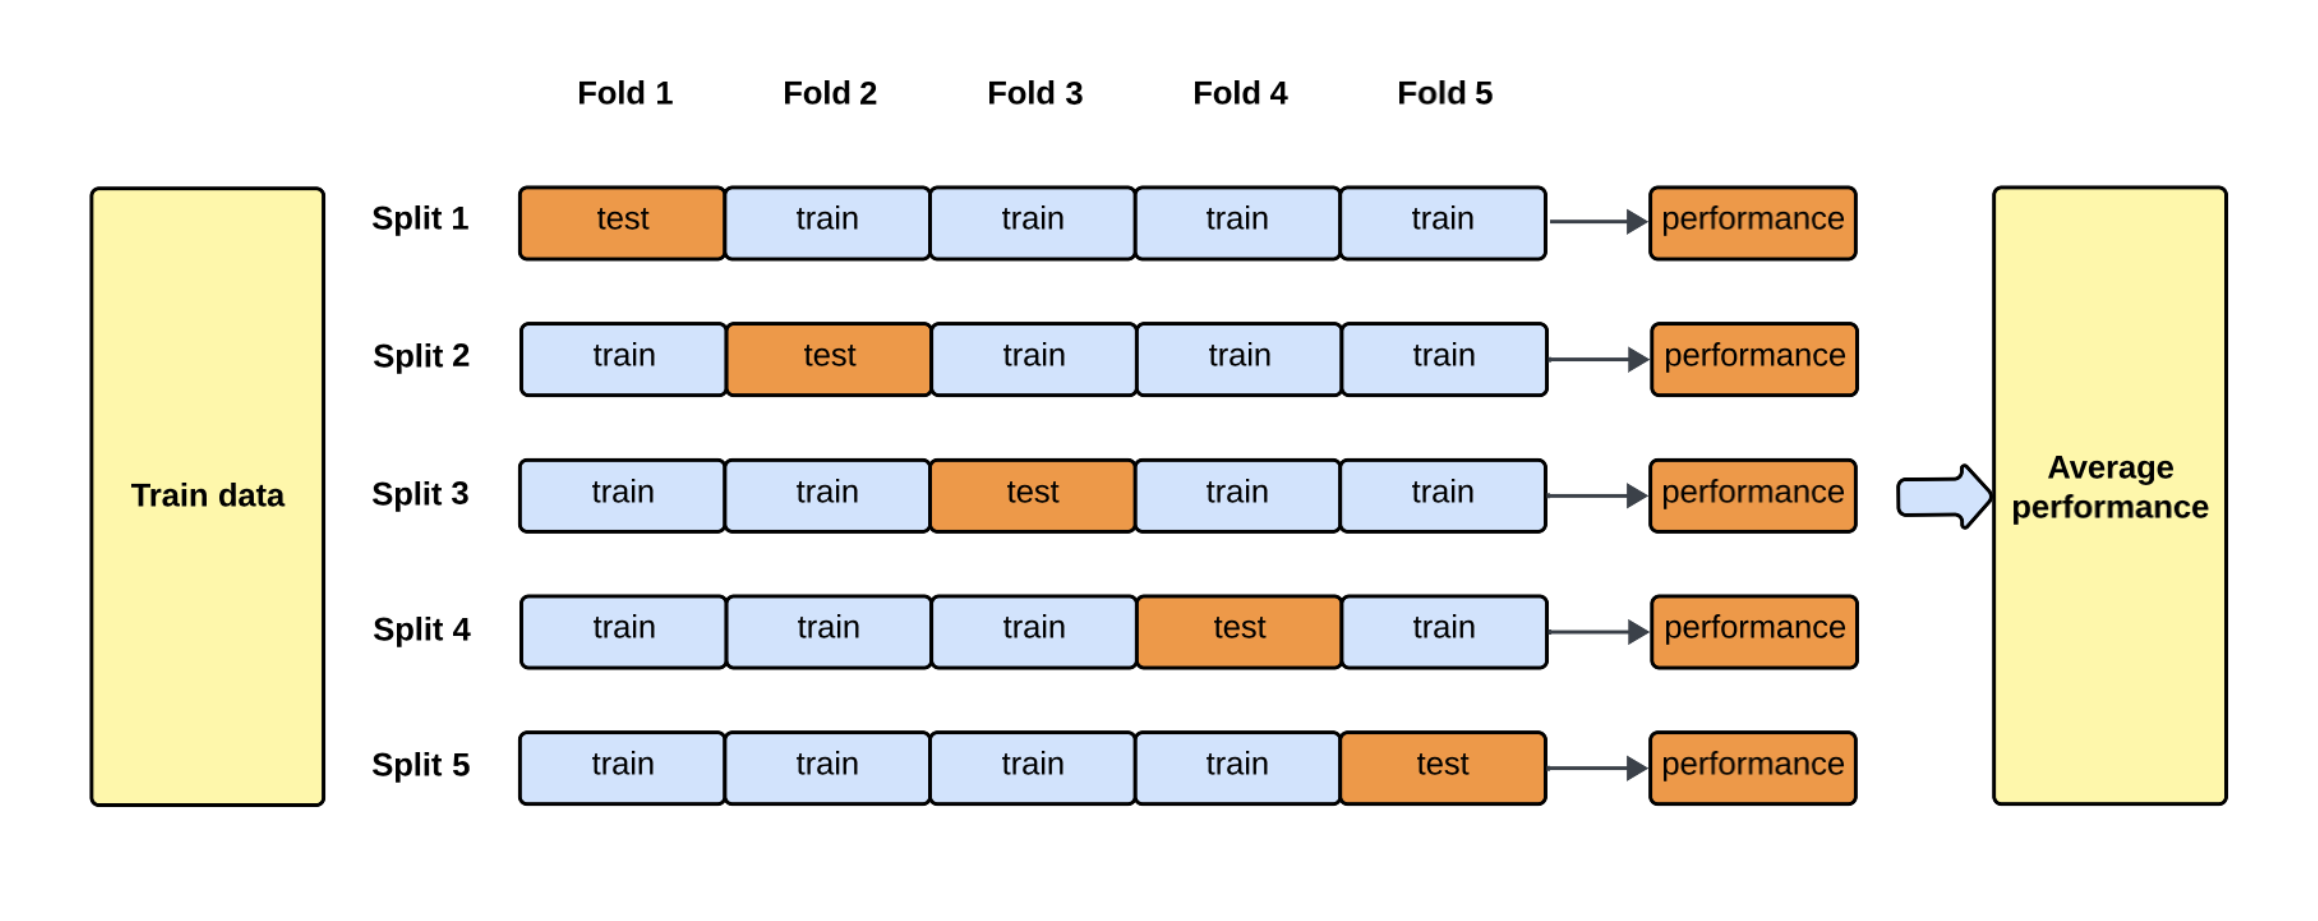

* K-fold CV divides the dataset into k folds (e.g., 5 or 10), training the model k times. For a dataset of 569 samples with 5-fold CV, it requires 5 model fits.
* A single random split can lead to variability in performance depending on how the data is partitioned. By using all data for both training and testing across k iterations, k-fold CV averages performance over multiple splits, reducing the impact of any single unlucky partition
* If the model’s performance is based on a single test set, and if the split happens to favor the training data there might be overfitting, K-Fold solves this

**So to ensure that the model performance from the previous section actual holds true regardless of the way data is partitioned, we will do K-Fold in this section and find the average accuracy**

In [34]:
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

y = np.ravel(y) # Turning it into a 1D array which is the expected input type for cross_val_scores

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Perform Cross Validation
scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')
# We take the SVM model we created
# We take the full dataset of features and target before the splt
# We create 5 folds to create different splits and find accuracy in each case

print(f"Accuracy for each fold: {scores}")

average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Accuracy for each fold: [0.97368421 0.99122807 0.97368421 0.99122807 0.97345133]
Average Accuracy: 0.9807
Standard Deviation: 0.0086


* High accuracy after K-Fold indicates the model is robust and performs well regardless of the way the data is being split.
* Low standard deviation indicates that the model’s performance is consistent across folds, meaning the model is stable and less sensitive to the specific data split.

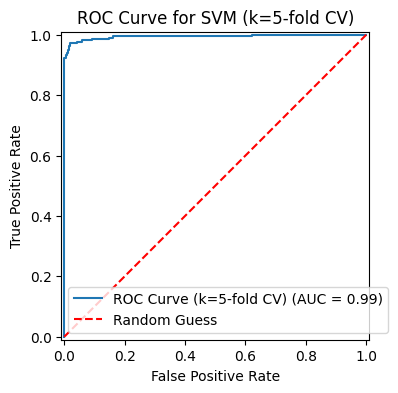

In [35]:
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

cv = k
y_scores = cross_val_predict(svm_model, X_scaled, y, cv=cv, method='decision_function')

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6, 4))
RocCurveDisplay.from_predictions(
    y_true=y,
    y_pred=y_scores,
    ax=ax,
    name=f'ROC Curve (k={k}-fold CV)'
)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for SVM (k={k}-fold CV)')
plt.legend()
plt.show()

Our ROC curve gives us further confidence that the model performs well

### Leave One Out Cross Validation (LOOCV)

* Leave-One-Out Cross-Validation (LOOCV) is a special case of k-fold cross-validation where the number of folds (k) equals the number of samples (n) in the dataset.
* Each fold consists of exactly one sample as the test set, and the remaining n-1 samples are used for training
* LOOCV uses nearly the entire dataset (n-1 samples) for training in each iteration, providing an almost unbiased estimate of the model’s generalization error. This is because the training set is as close as possible to the full dataset, reducing the risk of underrepresenting the data’s complexity.

However,
* It is mostly useful for small datasets because it is computationally heavy.
* LOOCV might end up capturing noise. Noisy data is bad for LOOCV. Noise could exaggerate errors, making LOOCV less trustworthy than k-fold CV, which handles noise better with larger test sets. K-fold cross-validation handles noise better than Leave-One-Out Cross-Validation (LOOCV) because it tests the model on multiple samples per fold rather than a single sample, diluting the impact of noisy data points.

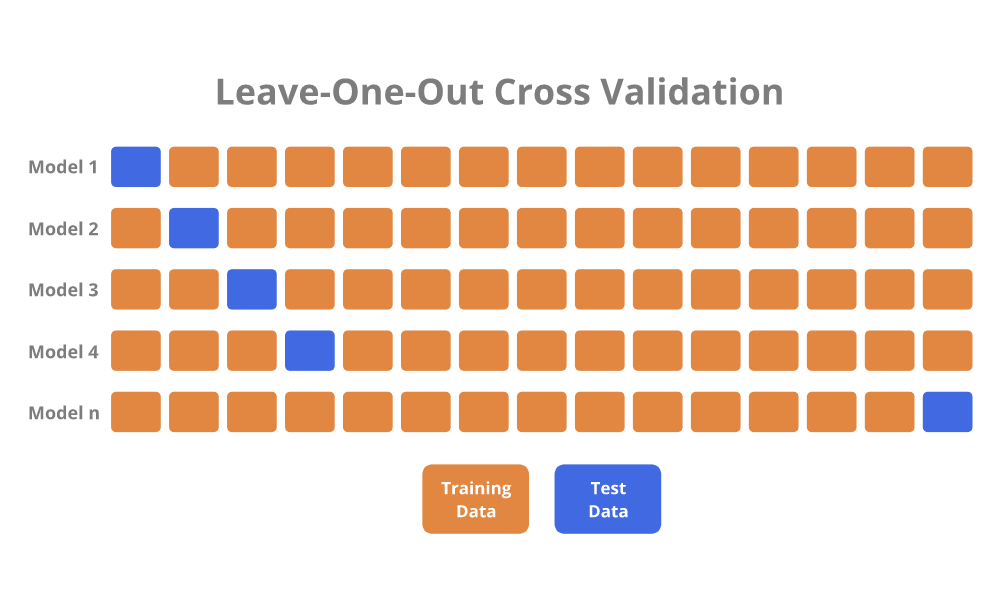

In [36]:
loo = LeaveOneOut()

# Performing Cross Validation using LOOCV
scores = cross_val_score(svm_model, X_scaled, y, cv=loo, scoring='accuracy')

print(f"Accuracy for each fold: {scores}")
average_accuracy = np.mean(scores)
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

Accuracy for each fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.

In our case, LOOCV also exhibits good accuracy, indicating that the data is not very noisy

## Hyperparameter Tuning

Now if we want to try out different combinations of hyperparameters and figure out the best possible hyperparameters for our context, we can use hyperparameter tuning methods line GridSearchCV and RandomSearchCV. We will use RandomSearchCV to do hyperparameter tuning according to our needs (We also use TunedThresholdClassifierCV to try out different probability thresholds).

**Though we are able to perform all the steps above at once using these processes, it was only made possible because we knew what hyperparameters to test. So, jumping to hyperparameter tuning without knowing what works for our model is not the best approach**.

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from scipy.stats import loguniform


# Here the svm finds best model according to our needs (Without changing threshold)
# We set all the possible combinations we believe should be tested
svm_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42, cache_size=1000), # Cache can speed up the model
    param_distributions={               # loguniform is used to test values on a logarithmic scale, optimal for SV
        'C': loguniform(1e-2, 1e2),     # Controls trade-off between margin and error
        'gamma': loguniform(1e-4, 1e0), # gamma controls RBF kernel width
        'kernel': ['rbf', 'linear'],    # We test both kernels
        'class_weight': [None, 'balanced']
    },
    n_iter=60,
    cv=5,
    scoring='recall', # We could also optimize for accuracy or other metrics
    n_jobs=-1,
    random_state=42
)
svm_search.fit(X_train, y_train)
best_svm = svm_search.best_estimator_

print("Best SVM params:", svm_search.best_params_) # This shows the best parameters for our purpose


# Now on our new svm model, set find the best threshold for our needs
# In our case we want to maximize recall to identify all cancer cases properly
tuned_clf = TunedThresholdClassifierCV(
    estimator=best_svm,
    scoring="recall",           # MAXIMIZE recall for malignant cells
    thresholds=np.arange(0.05, 0.5, 0.01),  # We want test thresholds starting from 0.05 to 0.5
    cv=5,
    random_state=42
)
tuned_clf.fit(X_train, y_train)

print(f"\nBEST THRESHOLD: {tuned_clf.best_threshold_:.4f}") # Shows us the best threshold for our purpose
print(f"CV Recall (malignant): {tuned_clf.best_score_:.4f}")

# Final predictions after tuning
y_pred = tuned_clf.predict(X_test)
y_proba = tuned_clf.predict_proba(X_test)[:, 1]

# We take look at the confusion matrix after all the tuning
cm = confusion_matrix(y_test, y_pred)

conf_df_tuning = pd.DataFrame(
    cm,
    index=['Actual 0', 'Actual 1'],
    columns=['Model 0', 'Model 1']
)

print("\n=== CONFUSION MATRIX (0 = Benign, 1 = Malignant) ===")
display(conf_df_tuning)

Best SVM params: {'C': np.float64(1.5375920235481764), 'class_weight': 'balanced', 'gamma': np.float64(0.0001334299028518796), 'kernel': 'linear'}

BEST THRESHOLD: 0.0500
CV Recall (malignant): 0.9882

=== CONFUSION MATRIX (0 = Benign, 1 = Malignant) ===


,Model 0,Model 1
Actual 0,61,11
Actual 1,0,42


After the hyperparamter tuning we find that all the steps we have done so far can be done through hyperparameter tuning if we know how to set what we are looking for. In our case, if the goal is to identify all cases of cancer then we need to maximize recall which give us the above results. We could choose to maximize other metrics depending on our needs as well.

## Base Model

We found a lot of accuracy metrics but we need to compare them to something to figure out if they are good or bad. To understand whether we need a ML model or not in the first place we establish a baseline which will show us the performance we need to achieve to justify creating a ML model. We can take 2 approaches here.
* Compare to simple random chance
* Compare to a dummy classifier

### Random Probability Based

* The base model accuracy based on simple **random chance** for our classifier model with 2 classes is simply **50%**. This is because the chance of randomly guessing if the case is benign or malignant without any additional tools is simply 50%. It will be the same thorughout our codebook wherever we have 2 target variables
* So, a performance above 50% may justify making a ML algorithm for our context. However, we need to be careful about how much we rely on it because 60% accuracy could mean that 40% of malignant cases are going undetected
* In case of 3 target variables the persistence model would have 33.33% accuracy, this chance of randomly picking the correct outcome from 3.
* The general formula for a random chance based persistence model for classifiers is = **100/(Number of classes)**

### Using a Dummy Classifier

DummyClassifier predicts using basic strategies like always picking the most frequent class (most_frequent), random guessing proportional to class distribution (stratified), or equal-probability random guesses (uniform)

**Why do we need a dummy classifier**
* A dummy classifier shows if our SVM’s performance is better than naive guessing, proving whether it learns real patterns.
* It clarifies our performance metrics and shows us the real benefits of using a ML algorithm in our context

SVM Model Performance (Scaled):
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Dummy Classifier Performance (Stratified):
              precision    recall  f1-score   support

      Benign       0.67      0.71      0.69        72
   Malignant       0.45      0.40      0.42        42

    accuracy                           0.60       114
   macro avg       0.56      0.56      0.56       114
weighted avg       0.59      0.60      0.59       114



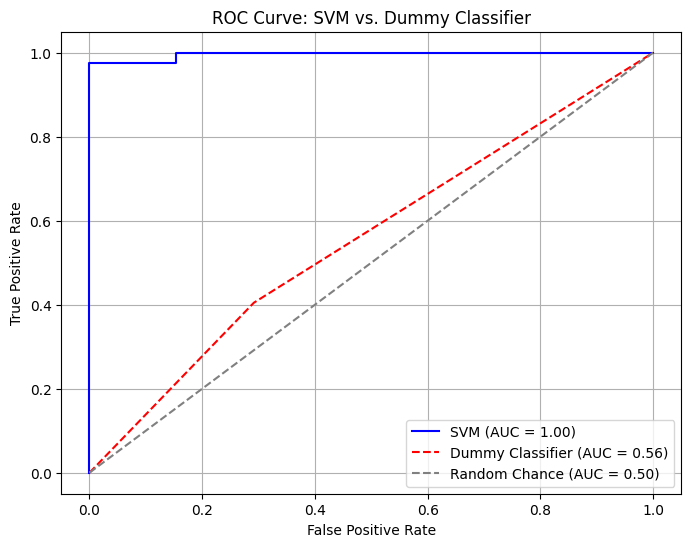

In [38]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='stratified', random_state=42)
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)

# Evaluating SVM model performance
print("SVM Model Performance (Scaled):")
svm_report = classification_report(y_test, y_pred_svm_scaled, target_names=['Benign', 'Malignant'])
print(svm_report)

# Evaluating Dummy Classifier performance
print("\nDummy Classifier Performance (Stratified):")
dummy_report = classification_report(y_test, y_pred_dummy, target_names=['Benign', 'Malignant'])
print(dummy_report)

# ROC Curve and AUC for both models
# Getting predicted probabilities for SVM
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability for positive class (Malignant)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Getting predicted probabilities for Dummy Classifier
y_prob_dummy = dummy_model.predict_proba(X_test)[:, 1]
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_prob_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plotting ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='blue')
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy Classifier (AUC = {roc_auc_dummy:.2f})', color='red', linestyle='--')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM vs. Dummy Classifier')
plt.legend()
plt.grid(True)
plt.show()

Upon comparing our ML model to the dummy classifier we see:

* Model has significantly better performance metrics than random guessing or DummyClassifier. This indicates that our model picked up useful patterns and is effective in classifying our dataset

# Visualization and Dimensionality Reduction

## **The Curse of Dimensionality**

High dimensionality can lead to certain issues

* Data Sparsity: As dimensions grow (e.g., from 2D to 30D), the volume of the feature space expands exponentially, causing data points to become increasingly isolated and "spread out." This sparsity makes it hard for SVM to identify meaningful patterns or clusters between benign and malignant cases, as points appear too far apart to form dense groups.

* Distance Distortion: In high dimensions, traditional distance metrics lose their effectiveness because all points tend to appear roughly equidistant from each other.

* Overfitting Risk: High-dimensional data amplifies the chance of models like SVM memorizing noise or irrelevant variations in the training data rather than learning generalizable patterns.

However, dimensionality reduction is **should not be done before using the kernel trick** as the kernel trick maps the data into higher dimension as the dimensions we have are not enough for creating a hyperplane. Reducing dimensionality on top of that can reduce information needed to do that. The process can be useful for linear SVM however if our data has a lot of noise.

**We use dimensionality reduction on both kernels just to show the visualization even though model performance should deteriorate with kernel trick in this case.**

We will also compare performances of all the models at the end.

## Principal Component Analysis (PCA)

First method of dimensionality reduction

* Essentially a preprocessing technique to reduce columns. Here we want to turn 30 columns into 2
* It is a dimensionality reduction technique used to simplify complex, high-dimensional datasets by transforming them into a lower-dimensional space while preserving as much variance (information) as possible. It identifies the directions (principal components) in which the data varies the most, allowing us to represent the data with fewer features without losing key patterns. This enables us to visualize data with high dimensionality.
* In our case we have 30 features. Hence, to visualize our decision boundary PCA is necessary.
* As we worked with the scaled data just before this section, our PCA will be done with the scaled data
* We will also visualize our decision boundaries using both linear and rbf kernel to demonstrate how kernels affect the model.

**This is not a mandatory step to run the SVM model. We only need this if we are trying to reduce the number of features or if we need to visualize the SVM hyperplane. In general, dimensionality reduction is useful when we have to deal with highly correlated features which might create noise**

* Ideally, when using the kernel trick, we do not need dimensionality reduction. Kernels like RBF or polynomial automatically project data into a higher-dimensional space where it becomes easier to separate — so reducing dimensions beforehand actually removes useful information which may negatively affect model performance. We are doing this just for visualization.
* In linear kernels dimensionality reduction may help if there is a lot of noise in the dataset. We will later compare the performaces of different approaches to understand our dataset better.
* **So though though reducing dimensionality may help the linear kernel, we should not do so when applying kernel trick.**

In [39]:
# In this step we reduce the 30 features into 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# A key issue here is we are using PCA for dimensionality reduction before fitting it into the model
# The RBF kernel implicitly maps data into a high-dimensional space.
# Using PCA before RBF might limit this flexibility by pre-reducing dimensions, potentially discarding useful separation the kernel could use
# However, the performance was evaluated in the previous section, here we only attempt to visualize the hyperplane

# Training SVM on PCA data (for visualization)
svm_linear = SVC(kernel='linear', random_state=42) # We test both linear and rbf kernels
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42) # Gamma parameter dynamically adjusts gamma based on the dataset's variance
svm_linear.fit(X_train_pca, y_train)
svm_rbf.fit(X_train_pca, y_train)

SVC(random_state=42)

**Note**
* Doing PCA before using the kernel trick is not optimal. When coding please refer to the code of the previous section. Here we only attempt to visualize the hyperplane which required reducing the dimensions for the sake of 2D visualization.
* Ideally, when using the kernel trick, we do not need dimensionality reduction

### Visualization
* Here we will simply try to see how the hyperplane created by SVM looks on a 2D plane (Made possible by PCA)

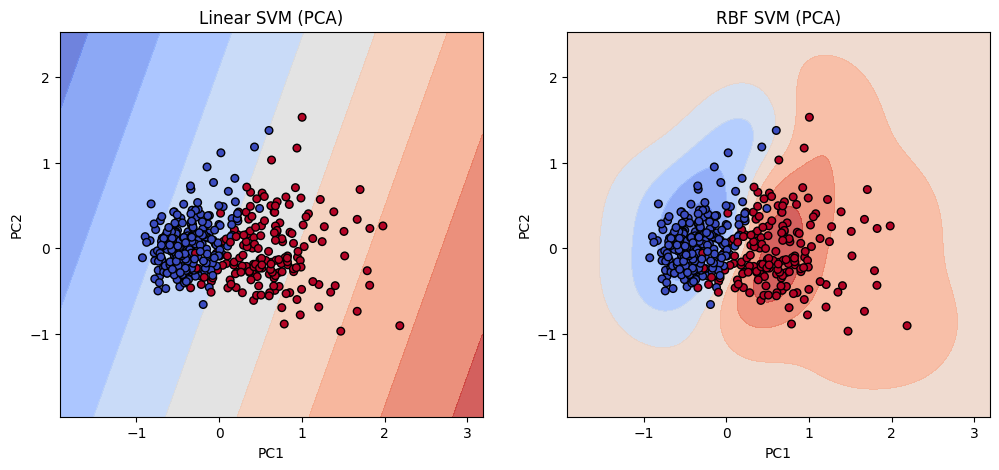

In [40]:
# We define the SVM boundary and plot it (Explanation of the code is given further down)
def plot_svm_boundary(X, y, model, title, ax):
    x_range = (X[:, 0].min() - 1, X[:, 0].max() + 1) # This line is just finding the min and max of value to put in the X_axis
    y_range = (X[:, 1].min() - 1, X[:, 1].max() + 1) # Same for y-Axis The Big X is independent values but the small x is x_axis
    xx, yy = np.meshgrid(np.linspace(*x_range, 100), np.linspace(*y_range, 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Meshgrid creates all possible points between two axis ranges
    # linspace creates evenly spaced values between the min and max values we found earlier
    # The 100 parameter indicates how many points we want to create between the min and max
    # The * operator unpacks the tuple into separate arguments for linspace

    y_array = np.asarray(y) # Ensuring y is np.array for c=y as we were initially getting an error
    ax.scatter(X[:, 0], X[:, 1], c=y_array, cmap=plt.cm.coolwarm, edgecolors='k', s=30) # scatter plots the actual data points, c=y colors them based on their true class
    ax.set(title=title, xlabel=f'PC1', ylabel=f'PC2') # We set titles and labels on the axes as well


# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # We create a figure with 1 row and 2 columns of subplots
plot_svm_boundary(X_train_pca, y_train, svm_linear, 'Linear SVM (PCA)', ax1) # We plot the linear SVM on the first subplot (ax1)
plot_svm_boundary(X_train_pca, y_train, svm_rbf, 'RBF SVM (PCA)', ax2) # We plot the RBF SVM on the second subplot (ax2)
plt.show() # We show the final plot

### Explaining the Visualization Code

AI help was taken to generate the code for visualization, however I will break down each part of the code in the following:
* np.meshgrid creates a big checkerboard of imaginary points over our data and the 0.5 adds a little extra space (0.5) on each side. np.linspace makes 100 evenly spaced points between the min and max, and np.meshgrid turns these into a 100x100 grid (10,000 points total)
* Z = model.decision_function() is the model measuring how close each spot on the map is to the decision line, with positive numbers on one side and negative on the other
* Z = Z.reshape(xx.shape) puts the long list of scores back into the 100x100 grid shape, matching the map we made earlier
* ax.contourf() colors the map based on the scores
* ax.scatter() puts dots on the map where your real data points are, colored to match their group (e.g., 0=blue, 1=red in the Breast Cancer dataset)
* ax.set_title(title) puts a label at the top of the picture

For the plotting part

* fig, (ax1, ax2) = plt.subplots() Creates a figure (fig) with two subplots (ax1 and ax2) side by side
* plot_svm_boundary() draws the line that separates groups for the linear model on the left graph, using your prepared data.

This code will be used throughout the notebook for plotting svm figures

### Linear vs Non-Linear (RBF) Boundaries

* In the left hand side we can see the visualization using linear kernel which just draws a straight line as the boundary, leading to a sub-optimal hyperlane in case of non-linear data
* In the right hand side we see a curved hyperplane which captures non-linear data better
* However, the difference is not noticeable here

### Accuracy

In [41]:
# Checking accuracy for both kernels
X_test_pca = pca.fit_transform(X_test)

train_acc_linear_pca = svm_linear.score(X_train_pca, y_train)
test_acc_linear_pca = svm_linear.score(X_test_pca, y_test)

train_acc_rbf_pca = svm_rbf.score(X_train_pca, y_train)
test_acc_rbf_pca = svm_rbf.score(X_test_pca, y_test)

print("Linear SVM - Train Accuracy:", train_acc_linear_pca)
print("Linear SVM - Test Accuracy:", test_acc_linear_pca)
print("RBF SVM - Train Accuracy:", train_acc_rbf_pca)
print("RBF SVM - Test Accuracy:", test_acc_rbf_pca)

Linear SVM - Train Accuracy: 0.945054945054945
Linear SVM - Test Accuracy: 0.9736842105263158
RBF SVM - Train Accuracy: 0.9494505494505494
RBF SVM - Test Accuracy: 0.9473684210526315


Upon checking accuracy for our new PCA trained model, we see that the accuracy drops. **Since we are able to use the kernel trick, we should rely on that instead of reducing dimensions when training the model. Dimensionality reduction is mostly done for visualization needs.** Even in the case of linear Kernel the test set accuracy of the model does not improve, indicating that our features do not have a lot of noise

## AutoEncoder

**Another approach of reducing dimensionality is the use of AutoEncoder**

* They can preserve more meaningful structures and variations in the data, resulting in richer feature embeddings. Autoencoders are inherently better at capturing **non-linear data** because of their non-linear transformations, meaning they might retain more information than PCA if we are working with a non-linear dataset
* Autoencoders work well with large and high-dimensional datasets, whereas PCA becomes less effective as data complexity increases
* AutoEncoders work by compressing data into a smaller representation and then reconstructing it back to its original form.

They have two main parts:

**Encoder**: Compresses the input into a lower-dimensional latent space (reducing dimensions).

**Decoder**: Reconstructs the original data from that compressed representation.

During training, the model learns to minimize the difference between the original input and the reconstructed output

**Again, though dimensionality is reduced through AutoEncoder, the lower number of features will not necessairily give better performance as the kernel trick in SVM is able to map data in a higher dimensionality. This may be useful for visualization needs**

### Encoding, Decoding and Visualizing

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


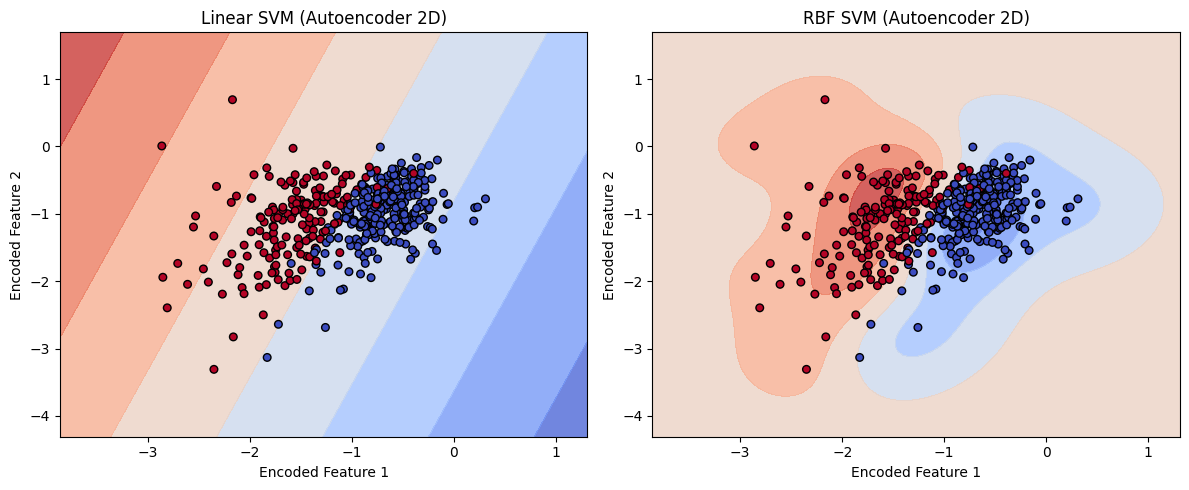

In [42]:
# Note: AI help was taken throughout this portion
# We need to make use of a new library named tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers


# Defining and training Autoencoder

input_dim = X_train.shape[1]
encoding_dim = 2  # Reduce to 2D for visualization

# Encoder-decoder structure
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(encoding_dim, activation='linear')(encoded)

decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compiling and training
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train,
                epochs=50, batch_size=32,
                shuffle=True, validation_split=0.2, verbose=0)

# Creating encoder model to extract 2D features
encoder = Model(inputs=input_layer, outputs=latent)
X_train_encoded = encoder.predict(X_train)

# Training SVMs on encoded data

svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)

svm_linear.fit(X_train_encoded, y_train)
svm_rbf.fit(X_train_encoded, y_train)


# Defining plotting function to visualize the hyperplane
def plot_svm_boundary(X, y, model, title, ax):
    x_range = (X[:, 0].min() - 1, X[:, 0].max() + 1)
    y_range = (X[:, 1].min() - 1, X[:, 1].max() + 1)
    xx, yy = np.meshgrid(np.linspace(*x_range, 100), np.linspace(*y_range, 100))
    y_array_2 = np.asarray(y)
    # Decision boundary
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Scatter plot of encoded data
    ax.scatter(X[:, 0], X[:, 1], c=y_array_2, cmap=plt.cm.coolwarm,
               edgecolors='k', s=30)

    ax.set(title=title, xlabel='Encoded Feature 1', ylabel='Encoded Feature 2')


# Plotting both models

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_svm_boundary(X_train_encoded, y_train, svm_linear, 'Linear SVM (Autoencoder 2D)', ax1)
plot_svm_boundary(X_train_encoded, y_train, svm_rbf, 'RBF SVM (Autoencoder 2D)', ax2)

plt.tight_layout()
plt.show()

### Accuracy

In [43]:
X_test_encoded = encoder.predict(X_test)

# Checking accuracy for both kernels
train_acc_linear = svm_linear.score(X_train_encoded, y_train)
test_acc_linear = svm_linear.score(X_test_encoded, y_test)

train_acc_rbf = svm_rbf.score(X_train_encoded, y_train)
test_acc_rbf = svm_rbf.score(X_test_encoded, y_test)

print("Linear SVM - Train Accuracy:", train_acc_linear)
print("Linear SVM - Test Accuracy:", test_acc_linear)
print("RBF SVM - Train Accuracy:", train_acc_rbf)
print("RBF SVM - Test Accuracy:", test_acc_rbf)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Linear SVM - Train Accuracy: 0.9472527472527472
Linear SVM - Test Accuracy: 0.9210526315789473
RBF SVM - Train Accuracy: 0.9472527472527472
RBF SVM - Test Accuracy: 0.9385964912280702


**The AutoEncoder method gives us around 94% accuracy for both kernels. This is less than our main model which used 30 features and also not better than our PCA model**

* This can be explained by the fact that our dataset comes with mostly linear data
* Either way as the SVM model is able to use the Kernel trick, we might not need to reduce dimensionality unless we want to visualize the hyperplane
* **However, when dealing with models where dimensionality reduction is necessary, it is important to know that AutoEncoder will perform better than PCA if the data has complex non-linear patterns**


# Comparison



In [56]:
# We make a dataframe using the accuracy results to compare the results
df_comparison = pd.DataFrame([
    ['92%', '90%'],
    ['98%', '98%'],
    ['97.30%', '94.70%'],
    ['92.10%', '93.80%']
], index=[
    'SVM (Without scaling)',
    'SVM (With scaling)',
    'SVM (PCA)',
    'SVM (AutoEncoder)'
], columns=['Linear', 'RBF'])

print(df_comparison)

                       Linear     RBF
SVM (Without scaling)     92%     90%
SVM (With scaling)        98%     98%
SVM (PCA)              97.30%  94.70%
SVM (AutoEncoder)      92.10%  93.80%


**Observations**
* The scaled SVM model without reducing dimensionality gives us the best performance. This model is also the best for adjusting thresholds and crafting the optimal model for our use case. The models tested after reducing dimensionality were mainly for visualization.
* RBF kernels of both dimensionality reduction approaches perform worse than the linear kernel as expected. We should not reduce dimensionality and try to use the kernel trick together.
* In our case, dimensionality reduction does not help the linear kernel either. This indicates that our data does not have a lot of noise and the curse of dimensionality does not affect our model.

# How Kernels Affect SVM (Using make_moons)

* Here we will further demonstrate how SVM works using the make_moons dataset from sklearn. This dataset is inherent more non-linear and will help us look at how kernels affect the model.

* We do so becasuse after our previous visualization after PCA we get fairly linear datapoints

In [45]:
from sklearn.datasets import make_moons

In [46]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)  # Without noise we would get 2 perfect crescent moons unlike real life data.
# The noise parameter spreads the datapoints making it more realistic

# Split into train/test sets so that we can compare model performance afterwards
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We train linear and RBF SVM
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf', gamma='scale')

""" Gamma='scale' lets scikit-learn automatically automatically adjusts how
sensitive the SVM is based on how spread out your data.
'scale' is the default input but we can manually change it if we want"""

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

We visualize the SVM boundary on make moons dataset to show how rbf kernel can better demarcate non-linear data

## Visualizing How Both Kernels Classified Train and Test Data
* We visualize SVM hyperplanes again using more non linear data to better demonstrate the power of kernels
* We further split the points based on training and testing data to visualize how well our model captured the test dataset
* PCA is not needed here for visualization as the model has only 2 features

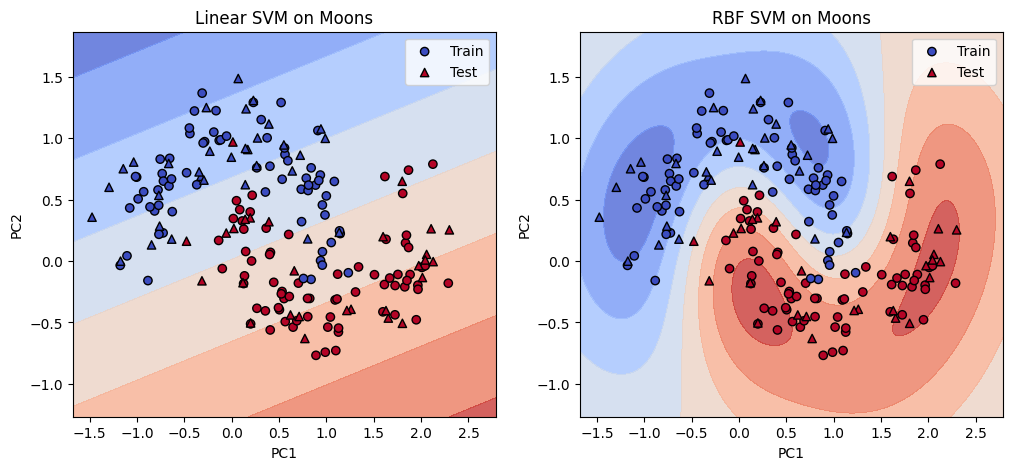

In [47]:
def plot_svm_boundary(X_train, y_train, X_test, y_test, model, title, ax):
    # Create a grid that covers the whole data space
    xx, yy = np.meshgrid(
        np.linspace(X_train[:, 0].min()-0.5, X_train[:, 0].max()+0.5, 200),
        np.linspace(X_train[:, 1].min()-0.5, X_train[:, 1].max()+0.5, 200)
    )

    # Getting model predictions for each point in the grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot training and test points differently
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm,
               edgecolors='k', marker='o', label='Train') # The label parameter separates the training and testing icons
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm,
               edgecolors='k', marker='^', label='Test')

    ax.set(title=title, xlabel=f'PC1', ylabel=f'PC2')
    ax.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_svm_boundary(X_train, y_train, X_test, y_test, svm_linear, 'Linear SVM on Moons', ax1)
plot_svm_boundary(X_train, y_train, X_test, y_test, svm_rbf, 'RBF SVM on Moons', ax2)

plt.show()

From the figures it is evident that the rbf kernel is much better at identifying different classes due to the non-linear nature of the data

## Linear vs RBF Performance

In [48]:
# Predict on test data
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate on unseen data
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy with linear kernel: {accuracy_linear:.2f}")
print(f"Accuracy with rbf kernel: {accuracy_rbf:.2f}")

Accuracy with linear kernel: 0.83
Accuracy with rbf kernel: 0.97


The linear kernel kernel gives 83% accuracy while the non-linear kernel can achieve 97% accuracy, demonstrating the strength of rbf kernel when we have to deal with non-linear data.

# SVM with 3 Target Variables (Using Iris)

Here we aim to demonstrate that SVM works with more than 3 target variables as well

In [49]:
from sklearn.datasets import load_iris

In [50]:
# We load iris as a dataframe to take a look at it
df = sns.load_dataset('iris')

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


It has 4 features and a Target
* So this will require PCA/Auto-encoding for visualization. We do PCA in this case as the dataset has simple patterns

**Note: PCA before modeling won't give the best model performance for kernels during kernel trick due to loss of information. But we are doing so to mainly visualize how the hyperplane looks like for 3 target variables. If our primary goal was to improve model accuracy we would take a different approach**

In [52]:
# The Iris dataset already comes with features and target separated so we load it into X and y again to make our modeling process easier
iris = load_iris()
X = iris.data
y = iris.target  # 0: Setosa, 1: Versicolor, 2: Virginica
feature_names = iris.feature_names
target_names = iris.target_names

In [53]:
# Splitting and scaling with MinMax
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Train SVM with linear and RBF kernels
svm_linear = SVC(kernel='linear', decision_function_shape='ovr')
svm_rbf = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovr')
svm_linear.fit(X_train_pca, y_train)
svm_rbf.fit(X_train_pca, y_train)

""" The decision_function_shape parameter in an SVM (Support Vector Machine) is like a rule that tells
the model how to handle more than two groups when deciding which group a flower belongs to,
like in your Iris dataset with Setosa, Versicolor, and Virginica. Since SVM is designed to
work with just two groups at a time, this setting helps it figure out what to do with three groups """

' The decision_function_shape parameter in an SVM (Support Vector Machine) is like a rule that tells\nthe model how to handle more than two groups when deciding which group a flower belongs to,\nlike in your Iris dataset with Setosa, Versicolor, and Virginica. Since SVM is designed to\nwork with just two groups at a time, this setting helps it figure out what to do with three groups '

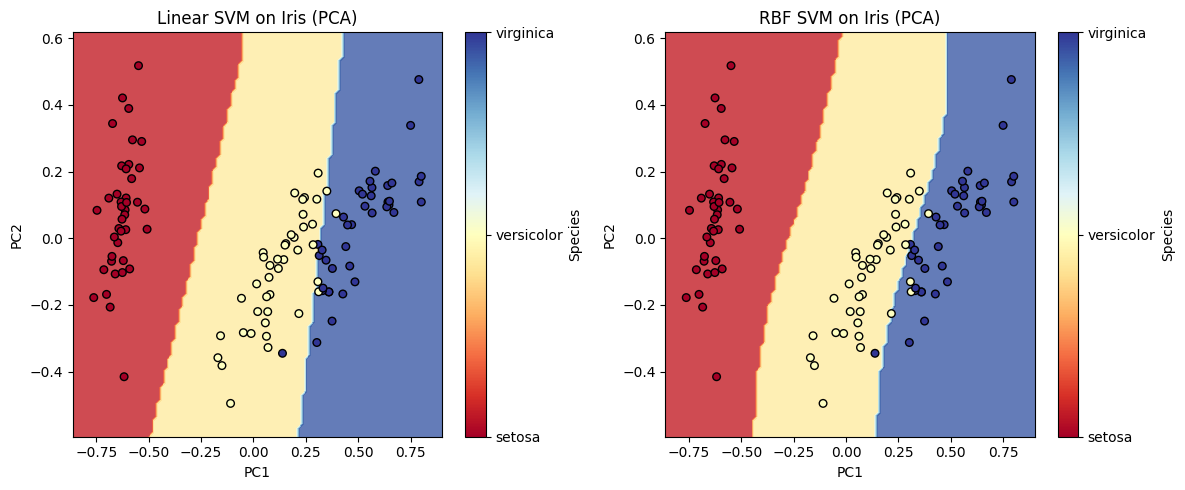

In [54]:
# Plotting function (multi-class)(We explain the relevant code for the multiclass visualization as well)
# Plotting function (multi-class)
def plot_svm_boundary(X, y, model, title, ax):
    x_range = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1) # This line is just finding the min and max of value to put in the X_axis
    y_range = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1) # Same for y-Axis The Big X is independent values but the small x is x_axis
    xx, yy = np.meshgrid(np.linspace(*x_range, 100), np.linspace(*y_range, 100))
    # Meshgrid creates all possible points between two axis ranges
    # linspace creates evenly spaced values between the min and max values we found earlier
    # The 100 parameter indicates how many points we want to create between the min and max
    # The * operator unpacks the tuple into separate arguments for linspace
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # ravel flattens the array and c_ combines the two arrays column-wise
    Z = np.argmax(Z, axis=1).reshape(xx.shape) # argmax finds the index of the highest value along axis 1 (rows) which corresponds to the predicted class
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8) # contourf draws filled contours, cmap sets the color scheme and alpha sets the transparency
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', s=30) # scatter plots the actual data points, c=y colors them based on their true class
    ax.set(title=title, xlabel=f'PC1', ylabel=f'PC2') # We can set titles and labels on the axes as well
    plt.colorbar(scatter, ax=ax, label='Species', ticks=[0, 1, 2], # Adding a color bar to indicate species
                 format=plt.FixedFormatter(target_names)) # FixedFormatter allows us to set custom labels for the ticks

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # We create a figure with 1 row and 2 columns of subplots
plot_svm_boundary(X_train_pca, y_train, svm_linear, 'Linear SVM on Iris (PCA)', ax1) # We plot the linear SVM on the first subplot (ax1)
plot_svm_boundary(X_train_pca, y_train, svm_rbf, 'RBF SVM on Iris (PCA)', ax2) # We plot the RBF SVM on the second subplot (ax2)
plt.tight_layout() # This adjusts the spacing between subplots to prevent overlap
plt.show() # We show the final plot

**We can see that SVM doesn't only work for 2 target variables, but it also works with multiple like 3 in the the iris dataset**

## Base Model (3 Target Categories)

In [55]:
# Model performance (Just to compare with a different persistence model)
X_test_pca = pca.transform(X_test_scaled)

y_pred_linear = svm_linear.predict(X_test_pca)
y_pred_rbf = svm_rbf.predict(X_test_pca)

# Calculate and print accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Linear SVM Accuracy: {accuracy_linear:.2f}")
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")

Linear SVM Accuracy: 1.00
RBF SVM Accuracy: 0.97


**This section was made only to demonstrate how our baseline performance changes depending on the number of target variables we have**

* The model shows perfect accuracy with the linear kernel. It also shows high accuracy with rbf kernel (But lower than linear, as expected) despite PCA not being the optimal approach for it (Done to compare visualization). This could be because the 3 classes already had very distinct features, making classification easy.

* **Now we contrast it against the random probability based model for 3 target variables.** In the case of 3 target variables the accuracy of a basic random chance based persistence model will be 33.33%. So the model may be useful if it can detect cases with an accuracy over 33.33%, like in our case.

* We can also use DummyClassifier for the same purpose